In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [3]:
from datasets import list_datasets
from datasets import load_dataset

/home/karvsmech/.local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Exploration into the dataset dict

In [4]:
# all_datasets = list_datasets()
# all_datasets

# print(f'the are {len(all_datasets)} datasets currently in the hugging face hub')
# print(f'the first 10 are: {all_datasets[:10]}')

emotions = load_dataset('emotion')
emotions

train_ids = emotions['train']
train_ids

print(f'the length of the training dataset is: {len(train_ids)}')

train_ids[0]

type(train_ids)

train_ids.column_names

print(train_ids.features)

emotions['train'].features

print(train_ids[:5])

print(train_ids['text'][:5])

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

the length of the training dataset is: 16000


{'text': 'i didnt feel humiliated', 'label': 0}

datasets.arrow_dataset.Dataset

['text', 'label']

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy'], 'label': [0, 0, 3, 2, 3]}
['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy']


In [5]:
dataset_url = "https://huggingface.co/datasets/transformersbook/emotion-train-split/raw/main/train.txt"
# !wget $dataset_url
!wget {dataset_url}


emotions_local = load_dataset('csv', data_files='train.txt', sep=';', names=['text', 'label'])
emotions_local

emotions_local['train'].column_names

emotions_local['train'].features

emotions_local['train'].num_rows

--2024-11-15 06:18:33--  https://huggingface.co/datasets/transformersbook/emotion-train-split/raw/main/train.txt
Resolving huggingface.co (huggingface.co)... 13.33.146.97, 13.33.146.86, 13.33.146.59, ...
Connecting to huggingface.co (huggingface.co)|13.33.146.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1658616 (1.6M) [text/plain]
Saving to: ‘train.txt.3’

train.txt.3         100%[===================>]   1.58M  2.18MB/s    in 0.7s    

2024-11-15 06:18:34 (2.18 MB/s) - ‘train.txt.3’ saved [1658616/1658616]



DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
})

['text', 'label']

{'text': Value(dtype='string', id=None),
 'label': Value(dtype='string', id=None)}

16000

In [6]:
# no need for wget, just use the url directly
dataset_url = "https://huggingface.co/datasets/transformersbook/emotion-train-split/raw/main/train.txt"
emotions_local = load_dataset('csv', data_files=dataset_url, sep=';', names=['text', 'label'])
emotions_local

emotions

# convert output format of the dataset
emotions.set_format(type='pandas')

df = emotions['train'][:]
df.head()

type(df)

def label_int2str(row):
    return emotions['train'].features['label'].int2str(row)

df['label_name'] = df['label'].apply(label_int2str)
df.head()

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
})

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3

pandas.core.frame.DataFrame

text  label label_name
0                            i didnt feel humiliated      0    sadness
1  i can go from feeling so hopeless to so damned...      0    sadness
2   im grabbing a minute to post i feel greedy wrong      3      anger
3  i am ever feeling nostalgic about the fireplac...      2       love
4                               i am feeling grouchy      3      anger

# looking at the class distribution

surprise     572
love        1304
fear        1937
anger       2159
sadness     4666
joy         5362
Name: label_name, dtype: int64

<Axes: >

Text(0.5, 1.0, 'frequency of classes')

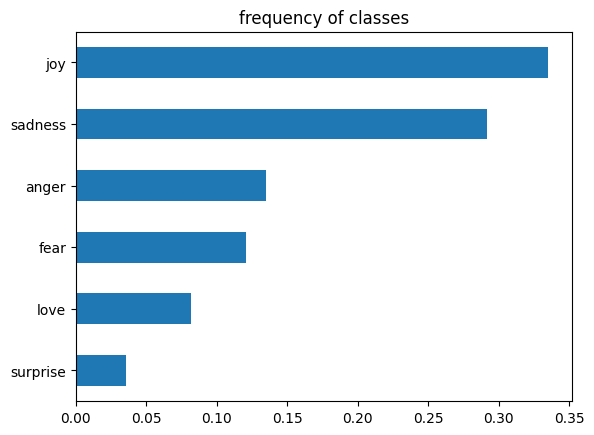

In [7]:
import matplotlib.pyplot as plt

df['label_name'].value_counts(ascending=True)

df['label_name'].value_counts(ascending=True, normalize=True).plot(kind='barh')
plt.title('frequency of classes')
plt.show()

<Axes: title={'center': 'words_per_tweet'}, xlabel='label_name'>

Text(0.5, 0.98, '')

Text(0.5, 0, '')

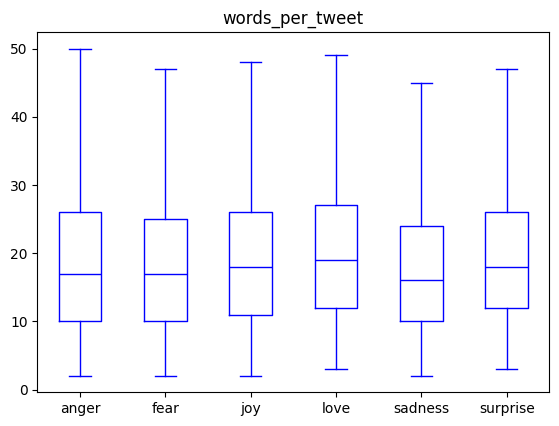

In [8]:
# how many words does our tweets have.
# this is to understand if the tweet lengths will go above the maximum context length of the model.

df['words_per_tweet'] = df['text'].str.split().apply(len)
df.boxplot(column='words_per_tweet', by='label_name', grid=False, showfliers=False, color='blue')
plt.suptitle("")
plt.xlabel("")
plt.show()

In [9]:
# we don't needs pandas Dataframe format anymore.
emotions.reset_format()

type(emotions['train'][:])

dict

# character tokenization

In [10]:
# from text to tokens

# character tokenization
text = 'Tokenizing text is a core task of NLP.'
tokenized_text = list(text)
print(tokenized_text)
print('\n')

token2idx = {ch:idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)
print('\n')

input_ids = [token2idx[ch] for ch in tokenized_text]
# these input_ids represent a ficticious ordering which neural networks are good at learning.
print(input_ids)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}


[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


In [11]:
# convert input_ids to one-hot vectors
import torch
import torch.nn.functional as F

input_ids = torch.tensor(input_ids)
input_ids

one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings

# From our simple example we can see that character-level tokenization ignores any structure in the text 
# and treats the whole string as a stream of characters. Although this helps deal with misspellings 
# and rare words, the main drawback is that linguistic structures such as words need to be learned 
# from the data. This requires significant compute, memory, and data. For this reason, 
# character tokenization is rarely used in practice. Instead, some structure of the text is 
# preserved during the tokenization step. Word tokenization is a straightforward approach to achieve this, 
# so let's take a look at how it works.

tensor([ 5, 14, 12,  8, 13, 11, 19, 11, 13, 10,  0, 17,  8, 18, 17,  0, 11, 16,
         0,  6,  0,  7, 14, 15,  8,  0, 17,  6, 16, 12,  0, 14,  9,  0,  3,  2,
         4,  1])

tensor([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0,

# Word Tokenization

In [12]:
text = 'Tokenizing text is a core task of NLP.'

tokenized_text = text.split()
print(tokenized_text)

token2id = {ch:idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2id)

input_ids = [token2id[txt] for txt in tokenized_text]
print(input_ids)

# disadvantages
# punctuation is not accounted for.  For example "NLP." is a single token in this example.
# number of word tokens could easily grow into

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']
{'NLP.': 0, 'Tokenizing': 1, 'a': 2, 'core': 3, 'is': 4, 'of': 5, 'task': 6, 'text': 7}
[1, 7, 4, 2, 3, 6, 5, 0]


# Subword tokenization

In [13]:
#  There are several subword tokenization algorithms that are commonly used in NLP, 
#  but let's start with WordPiece. wordpiece is the subword tokenizing algorithm used in 
# BERT and DistilBERT.

from transformers import AutoTokenizer

text = 'Tokenizing text is a core task of NLP.'

model_ckpt = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
print(model_ckpt)

distilbert-base-uncased


In [14]:
encoded_text = tokenizer(text)
print(encoded_text)
print('\n')
print(encoded_text['input_ids'])

# this is in a dictionary format.
# converting the input_ids back to tokens

print('\n')
tokens = tokenizer.convert_ids_to_tokens(encoded_text['input_ids'])
print(tokens)

# convert tokens back to strings
print('\n')
print(tokenizer.convert_tokens_to_string(tokens))

# vocabulary size of the model
tokenizer.vocab_size

# maximum context size
tokenizer.model_max_length

# names of the fields the model expects in the forward pass
tokenizer.model_input_names

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


[101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102]


['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


[CLS] tokenizing text is a core task of nlp. [SEP]


30522

512

['input_ids', 'attention_mask']

# Another way of retrieving the tokenizer used for pretraining the distil bert model.
from transformers import DistilBertTokenizer

distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

encoded_text = distilbert_tokenizer(text)
print(encoded_text)

# tokenizing the whole dataset

In [15]:
# tokenizer can take string or a list of strings as an input.


def tokenize(batch):
    return tokenizer(batch['text'], padding=True, truncation=True)

emotions_partially_encoded = tokenize(emotions['train'][:2])
emotions_partially_encoded

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [16]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)
# dataset dict itself has been returned back by the map function
emotions_encoded

# additional columns input_ids and attention_mask has been added to the dataset dict.
emotions_encoded['train'].column_names

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

['text', 'label', 'input_ids', 'attention_mask']